# 1. Linear Regression

## 1.1. The algorithm
[Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) finds the best fitting hyperplane that represents the linear relationship between the output variable $\mathbf{y}$ and the input variables $\mathbf{x}_1,\mathbf{x}_2,\dots$. The regression function is:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots$$

where:
- $\mathbf{y}$ is the output variable
- $\hat{\mathbf{y}}$ is the estimation of $\mathbf{y}$
- $\mathbf{x}_1,\mathbf{x}_2,\dots$ are the input variables
- $w_0,w_1,w_2,\dots$ are the parameters

The [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) method used in Linear Regression considers the loss function:

$$L(\mathbf{w}) = \mbox{SSE}=\sum(y_i-\hat{y}_i)^2$$

The vector of parameters $\mathbf{w}$ is estimated as: $\hat{\mathbf{w}} =\arg\min L(\mathbf{w})$.

### Regularized algorithms
Linear Regression itself has no hyperparamater, however there are alternative algorithms, [Ridge Regression](https://scikit-learn.org/stable/modules/linear_model.html#regression) and [Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso). They work almost the same way with the OLS regression, but they add a penalty quantity to the loss function with a coefficient $\alpha$ to control how significant that penalty term is. $\alpha$ can be considered as a hyperparameter, and the value is usually set to $\alpha=10^k$ for $k\in[-5,5]$.

The loss function for Ridge Regression:

$$L(\mathbf{w}) = \sum(y_i-\hat{y}_i)^2 + \alpha\sum w_i^2$$

The loss function for Lasso Regression:

$$L(\mathbf{w}) = \frac{1}{2n}\sum(y_i-\hat{y}_i)^2 + \alpha\sum|w_i|$$

Ridge and Lasso Regression are quite similar, the only difference between them is when $\alpha$ becomes very high, Ridge Regression can only shrink the parameters asymptotically close to 0, while Lasso Regression can shrink the parameters all the way to 0. Therefore, Lasso Regression can lead to feature selection by letting the unrelated variables have their weights of 0.

### Elastic Net
[Elastic Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) is the combination of Ridge Regression and Lasso Regression. It uses the following loss function:

$$L(\mathbf{w}) =
\frac{1}{2n}\sum(y_i-\hat{y}_i)^2 +
\alpha\left(\beta\sum{|w_i|}+\frac{1-\beta}{2}\sum{w_i^2}\right)$$

where $\alpha$ is the magnitude and $\beta$ is the $L_1$ ratio.

## 1.2. Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

In [4]:
df = pd.read_csv('data/boston.csv')
df.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
x = df.copy()
y = x.pop('price')
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

### OLS Regression
[Ordinal Linear Regression implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) does not really have any hyperparameter.

In [5]:
ols = LinearRegression().fit(xTrain, yTrain)

In [6]:
r2_train = ols.score(xTrain, yTrain)
r2_test = ols.score(xTest, yTest)

print(f'R-squared training: {r2_train:.2%}')
print(f'R-squared testing: {r2_test:.2%}')

R-squared training: 76.99%
R-squared testing: 57.85%


In [7]:
yTrainPred = ols.predict(xTrain)
yTestPred = ols.predict(xTest)

rmse_train = MSE(yTrain, yTrainPred, squared=False)
rmse_test =  MSE(yTest, yTestPred, squared=False)

print(f'RMSE training: {rmse_train:.2f}')
print(f'RMSE testing: {rmse_test:.2f}')

RMSE training: 4.43
RMSE testing: 5.84


### Ridge Regression

In [8]:
params = {'alpha': np.logspace(-5, 5, 11)}
ridge = GridSearchCV(Ridge(normalize=True), params, cv=5).fit(xTrain, yTrain)
ridge.best_params_

{'alpha': 0.01}

In [9]:
r2_train = ridge.score(xTrain, yTrain)
r2_test = ridge.score(xTest, yTest)

print(f'R-squared training: {r2_train:.2%}')
print(f'R-squared testing: {r2_test:.2%}')

R-squared training: 76.97%
R-squared testing: 57.67%


In [10]:
yTrainPred = ridge.predict(xTrain)
yTestPred = ridge.predict(xTest)

rmse_train = MSE(yTrain, yTrainPred, squared=False)
rmse_test =  MSE(yTest, yTestPred, squared=False)

print(f'RMSE training: {rmse_train:.2f}')
print(f'RMSE testing: {rmse_test:.2f}')

RMSE training: 4.43
RMSE testing: 5.85


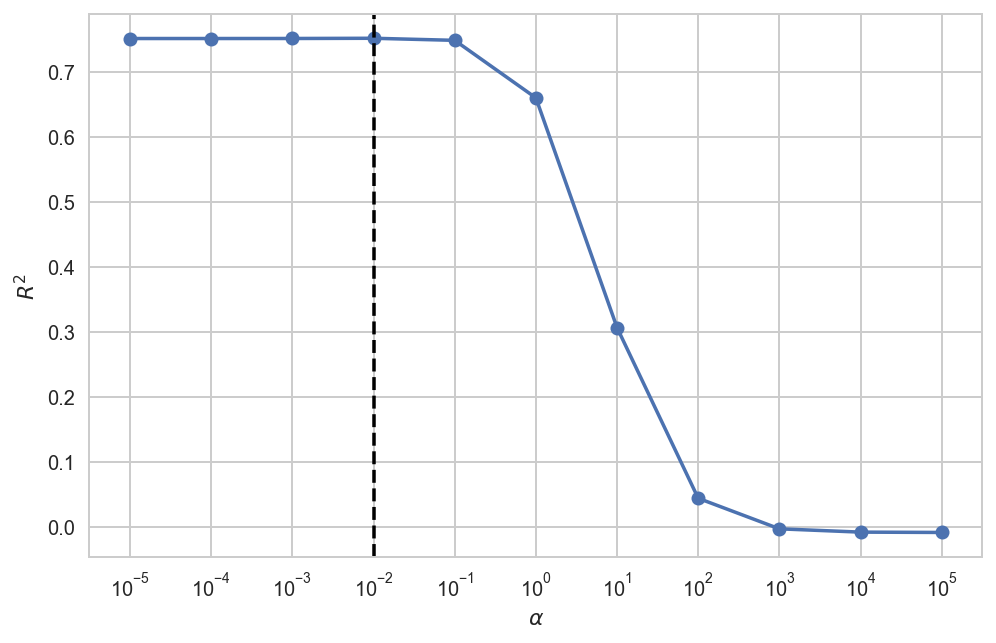

In [11]:
alphas = params['alpha']
scores = ridge.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(alphas, scores, '-o')
ax.axvline(ridge.best_params_['alpha'], ls='--', c='k')
ax.set_xscale('log', base=10)
ax.set_xticks(alphas)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$R^2$')
plt.show()

In [12]:
ridge.best_estimator_.coef_

array([-1.20216416e-01,  2.85839653e-02,  8.76587387e-03,  2.85750340e+00,
       -1.42459082e+01,  5.27277839e+00, -1.11086225e-02, -1.22326698e+00,
        2.36716137e-01, -1.02008161e-02, -9.00515373e-01,  1.00404518e-02,
       -3.86769366e-01])

### Lasso Regression

In [13]:
params = {'alpha': np.logspace(-5, 5, 11)}
lasso = GridSearchCV(Lasso(normalize=True), params, cv=5).fit(xTrain, yTrain)
lasso.best_params_

{'alpha': 0.001}

In [14]:
r2_train = lasso.score(xTrain, yTrain)
r2_test = lasso.score(xTest, yTest)

print(f'R-squared training: {r2_train:.2%}')
print(f'R-squared testing: {r2_test:.2%}')

R-squared training: 76.96%
R-squared testing: 57.62%


In [15]:
yTrainPred = lasso.predict(xTrain)
yTestPred = lasso.predict(xTest)

rmse_train = MSE(yTrain, yTrainPred, squared=False)
rmse_test =  MSE(yTest, yTestPred, squared=False)

print(f'RMSE training: {rmse_train:.2f}')
print(f'RMSE testing: {rmse_test:.2f}')

RMSE training: 4.43
RMSE testing: 5.85


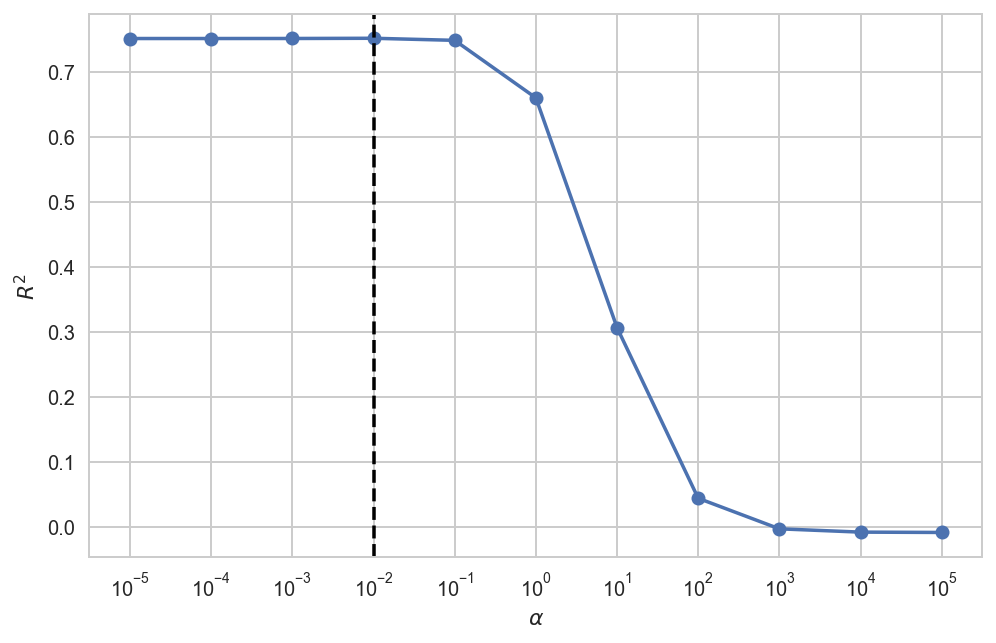

In [16]:
alphas = params['alpha']
scores = ridge.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(alphas, scores, '-o')
ax.axvline(ridge.best_params_['alpha'], ls='--', c='k')
ax.set_xscale('log', base=10)
ax.set_xticks(alphas)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$R^2$')
plt.show()

## 1.3. Feature selection
Lasso Regression can be applied to remove unrelated variables, thanks to the ability to reduce their coefficients all the way to 0.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE

In [4]:
df = pd.read_csv('data/boston.csv')
df.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
x = df.copy(); y = x.pop('price')
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [19]:
params = {'alpha': np.logspace(-5, 5, 11)}
lasso = GridSearchCV(Lasso(normalize=True), params, cv=5).fit(xTrain, yTrain)
lasso.best_params_

{'alpha': 0.001}

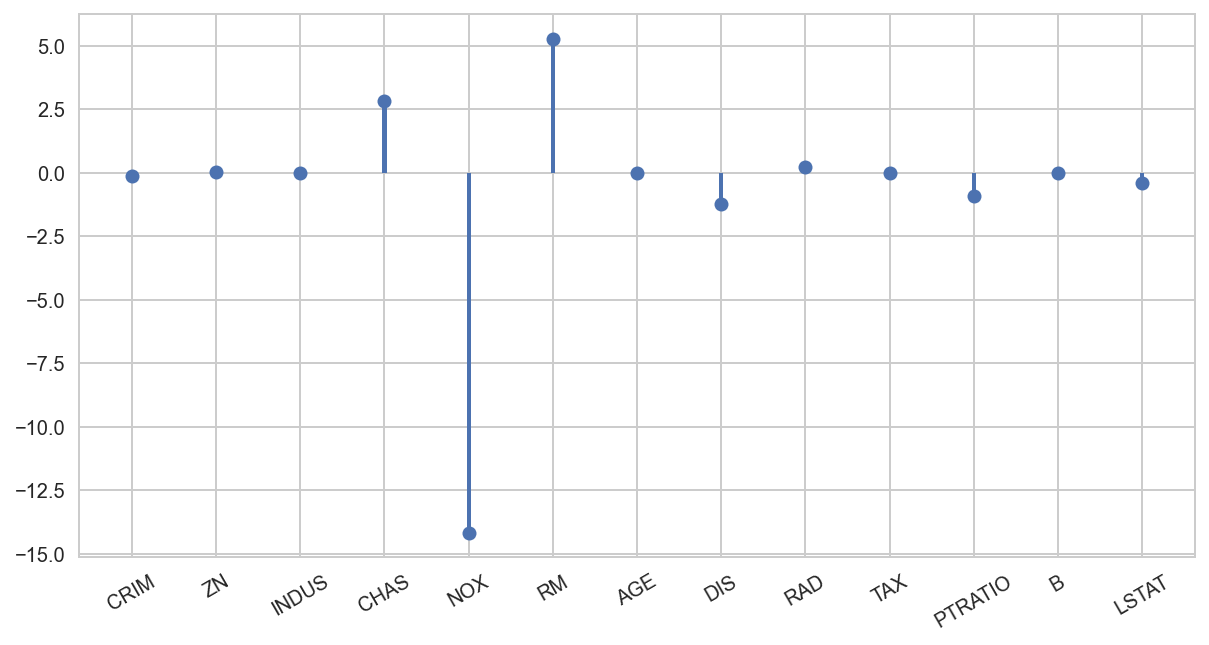

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(boston.feature_names, lasso.best_estimator_.coef_, width=0.05)
ax.plot(boston.feature_names, lasso.best_estimator_.coef_, 'o')
ax.tick_params(axis='x', labelrotation=30)
plt.show()

# 2. Polynomial Regression

## 2.1. The algorithm
Linear Regression, in fact is the simplest case of a more general algorithm, Polynomial Regression. Polynomial Regression applies a polynomial to a variable, while Linear Regression only uses a monomial with the degree of 1.

Performing Polynomial Regression is actually performing Linear Regression on transformed data. To make this process easier to understand, let's say there are two input variables, $(\mathbf{x}_1,\mathbf{x}_2$), and a output variable, $\mathbf{y}$. Now apply Linear Regression on new transformed sets of input such as $(\mathbf{x}_1, \mathbf{x}_1^2, \mathbf{x}_2)$, $(\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_1^2, \mathbf{x}_2^2, \mathbf{x}_1\mathbf{x}_2)$ or $(\mathbf{x}_1^{-1}, \ln\mathbf{x}_2)$.

A huge disadvantage of Polynomial Regression is that it can easily lead to overfitting. Think about a function that fits perfectly all data points, it also captures the noises and definitely cannot perform well on predicting data it has never seen before. Therefore, how to choose the right function for each variable is more of an art than a science. It requires to visualize every single variable, and look carefully at the variation and the possible extrema.

## 2.2. Implementation
In this section, we use only one input variable, LSTAT ($\mathbf{x}$), to predict PRICE ($\mathbf{y}$). First, the relationship between $\mathbf{x}$ and $\mathbf{y}$ is visualized, but notice that the two axes must have the same scale. Then, try several strategies to choose a function that you think best describes the general trend in the data. An aspect ratio other than 1 makes the slope/sensitivity look different, and probably you will make a wrong decision.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('data/boston.csv')
df.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
x = df.lstat.values.reshape(-1,1)
y = df.price.values

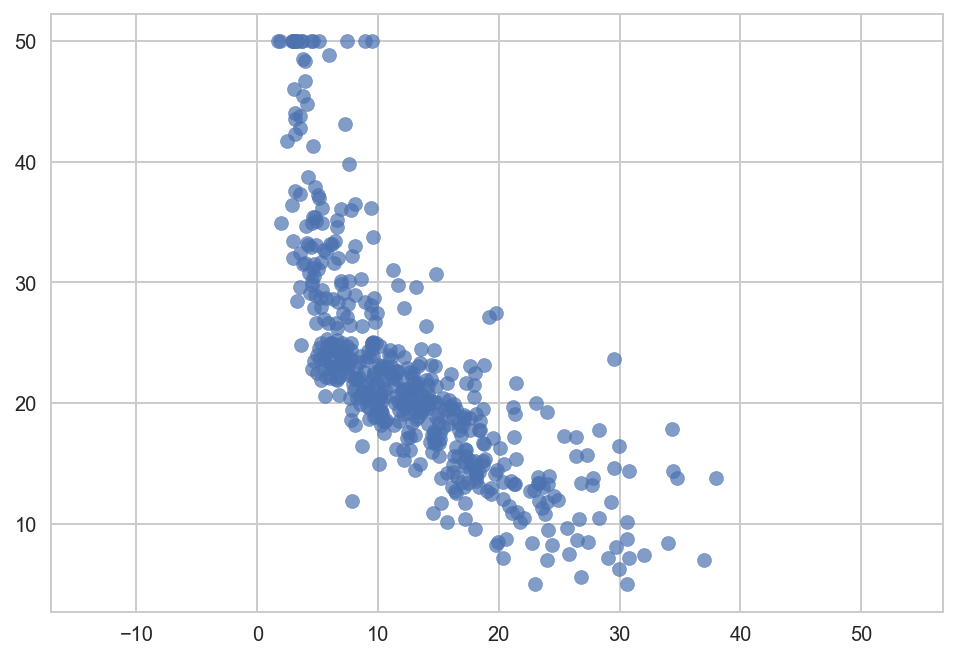

In [24]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.axis('equal')
plt.show()

### Monomial Regression
To best describe the trend in the data, a line (in Linear Regression) is just too simple, so we are going to need a curve. A power function may be useful in this case.

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}^{-\frac{3}{4}}$$

In [25]:
transformer = FunctionTransformer(lambda x: x**(-3/4))
xNew = transformer.transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xNew, y, test_size=0.2, random_state=7)

In [26]:
ols = LinearRegression().fit(xTrain, yTrain)

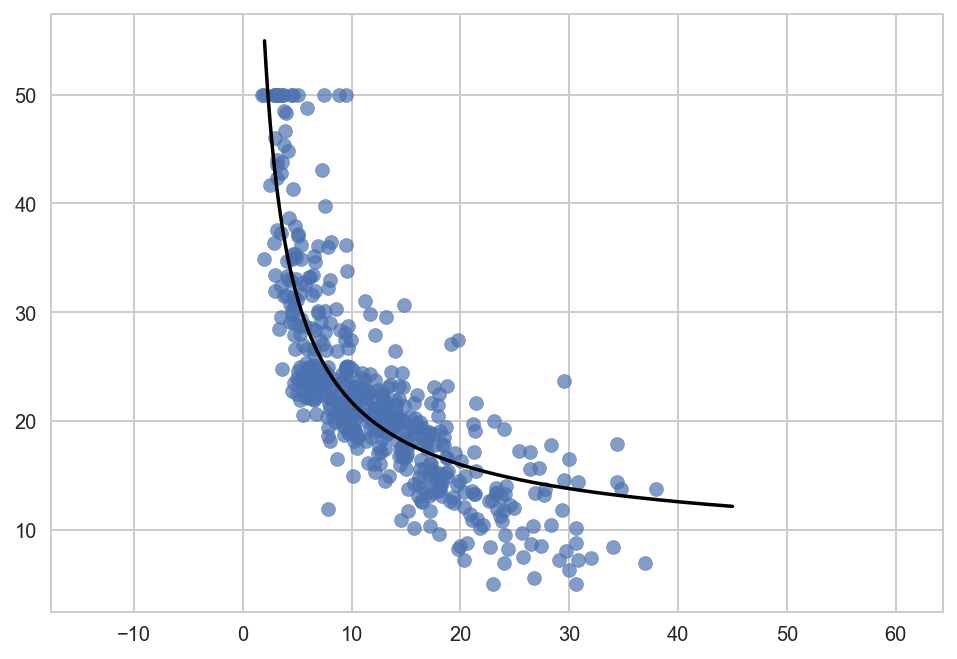

In [27]:
xPlot = np.linspace(2, 45, 1000).reshape(-1,1)
yPlot = ols.predict(transformer.transform(xPlot))

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.plot(xPlot, yPlot, 'k')
ax.axis('equal')
plt.show()

In [28]:
ols.score(xTrain, yTrain)

0.6585612704728155

In [29]:
ols.score(xTest, yTest)

0.6699642428674772

### Polynomial Regression
Monomial Regression seems did not perform very well, let's try Polynomial Regression this time. As observed, the distribution of the data looks like a part of a parabola (there is one possible minimum). The prediction function will be:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}+w_2\mathbf{x}^2$$

In [30]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
xNew = transformer.fit_transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xNew, y, test_size=0.2, random_state=7)

In [31]:
ols = LinearRegression().fit(xTrain, yTrain)

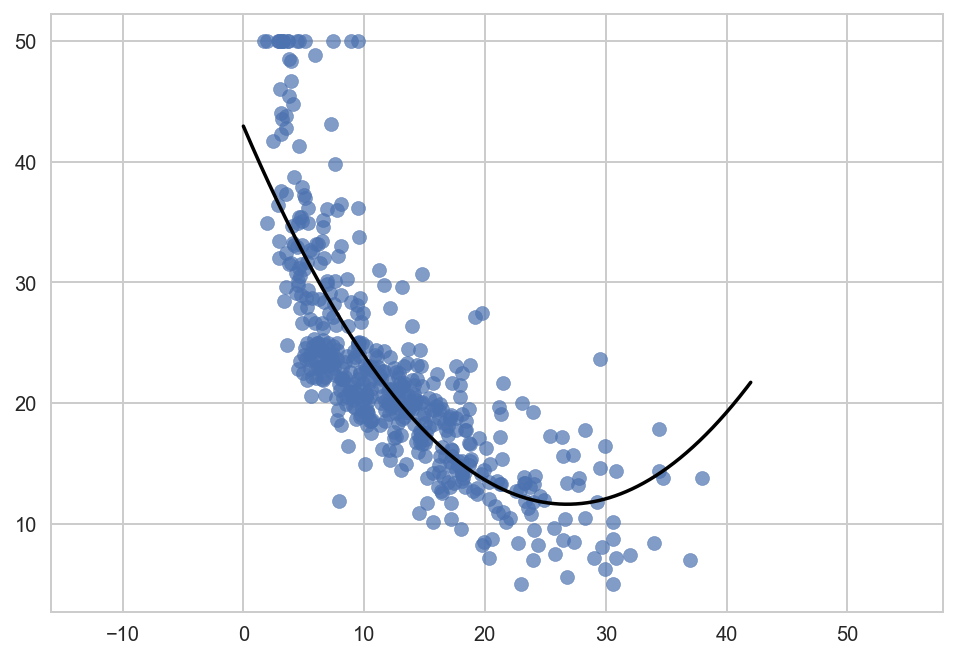

In [32]:
xPlot = np.linspace(0, 42, 1000).reshape(-1,1)
yPlot = ols.predict(transformer.transform(xPlot))

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.plot(xPlot, yPlot, 'k')
ax.axis('equal')
plt.show()

In [33]:
ols.score(xTrain, yTrain)

0.6445208575259154

In [34]:
ols.score(xTest, yTest)

0.6246852597464592

# 3. Logistic Regression

## 3.1. The algorithm
In [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), the output variable $\mathbf{y}$ has exactly two possible values labeled 1 (positive) and 0 (negative). The algorithm outputs a number in the interval $[0,1]$ describing the probability that an observation falls into the positive class. Therefore, Logistic Regression is used in classification. The regression function is:

$$p = \frac{1}{1+e^{-(w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots)}}$$

where:
- $\mathbf{y}=y_1,y_2,\dots,y_n$ is the output variable
- $p=P(y_i=1|\mathbf{x}_i;\mathbf{w})$ is the probability that $y_i=1$
- $\mathbf{x}_1,\mathbf{x}_2,\dots$ are the input variables
- $w_0,w_1,w_2,\dots$ are the model parameters

Another form of the regression function that emphasizes the odds ratio (success over failed) is sometimes used:

$$\ln(\frac{p}{1-p}) = w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots$$

The regression function can be rewritten: $p=f(\mathbf{X}\mathbf{w})$, where $f$ stands for the standard logistic function. The derivative of $f$ follows logistic distribution.

$$f(x)=\frac{1}{1+e^{-x}}$$

### The loss function
Derived from the regression function, we have $P(\mathbf{y}=1)=f(\mathbf{X}\mathbf{w})$ and $P(\mathbf{y}=0)=1-f(\mathbf{X}\mathbf{w})$. Summarizing these two functions gives the likelihood:

$$P(\mathbf{y}=y|\mathbf{X}) = p^y(1-p)^{1-y} = \prod{p_i^{y_i}(1-p_i)^{1-y_i}}$$

Our approach is to maximize the likelihood, alongside with the log-likelihood. Therefore, the negative log-likelihood is chosen to be the loss function.

$$L(\mathbf{w}) = -\log P(\mathbf{y}|\mathbf{X}) = \sum{\left[y_i\log{p_i}+(1-y_i)\log{(1-p_i)}\right]}$$

The vector of parameters $\mathbf{w}$ is estimated as: $\hat{\mathbf{w}} =\arg\min L(\mathbf{w})$.

## 3.2. Implementation
[Logistic Regression implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) does not have any hyperparameters.

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [36]:
credit = pd.read_csv('data/credit_scoring.csv')
credit = credit.dropna().reset_index()
credit.head()

,index,bad_customer,credit_balance_percent,age,num_of_group1_pastdue,debt_ratio,income,num_of_loans,num_of_times_late_90days,num_of_estate_loans,num_of_group2_pastdue,num_of_dependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [37]:
y = credit.bad_customer.values
x = credit.drop(columns='bad_customer')

In [38]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler().fit(xTrain)

xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [39]:
logistic = LogisticRegression().fit(xTrain, yTrain)

In [40]:
yTrainPred = logistic.predict(xTrain)
yTestPred = logistic.predict(xTest)
yTestProb = logistic.predict_proba(xTest)

In [41]:
prob = pd.DataFrame(yTestProb)
prob = prob.assign(class_=yTestPred)
prob.head()

,0,1,class_
0,0.980067,0.019933,0
1,0.942151,0.057849,0
2,0.973669,0.026331,0
3,0.938395,0.061605,0
4,0.923867,0.076133,0


In [42]:
print(classification_report(yTrain, yTrainPred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     89539
           1       0.58      0.04      0.08      6676

    accuracy                           0.93     96215
   macro avg       0.76      0.52      0.52     96215
weighted avg       0.91      0.93      0.90     96215



In [43]:
print(classification_report(yTest, yTestPred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22373
           1       0.53      0.04      0.08      1681

    accuracy                           0.93     24054
   macro avg       0.73      0.52      0.52     24054
weighted avg       0.90      0.93      0.90     24054



# 4. k-Neighbors Regression
*Reference: [Scikit-Learn - k-Neighbors Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)*

## 4.1. The algorithm
All classification algorithms have a regression version. 
$k$-NN is a non-parametric algorithm which uses the average labels of $k$ nearest neighbors as the prediction output for new data point.

$$\hat{y} = \frac{1}{k}\sum_{i=1}^{k}{y_i}$$

where $y_1,y_2,\dots,y_k$ are the labels of the $k$ points with the smallest distance. The distance used in $k$-NN is Euclidean distance.

## 4.2. Implementation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

In [4]:
df = pd.read_csv('data/boston.csv')
df.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
x = df.copy(); y = x.pop('price')
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [46]:
params = {'n_neighbors': np.arange(1, 12)}
knn = GridSearchCV(KNeighborsRegressor(), params, cv=5).fit(xTrain, yTrain)
knn.best_params_

{'n_neighbors': 4}

In [47]:
r2_train = knn.score(xTrain, yTrain)
r2_test = knn.score(xTest, yTest)

print(f'R-squared training: {r2_train:.2%}')
print(f'R-squared testing: {r2_test:.2%}')

R-squared training: 74.46%
R-squared testing: 48.55%


In [48]:
yTrainPred = knn.predict(xTrain)
yTestPred = knn.predict(xTest)

mse_train = MSE(yTrain, yTrainPred)
mse_test =  MSE(yTest, yTestPred)

print(f'MSE training: {mse_train:.2f}')
print(f'MSE testing: {mse_test:.2f}')

MSE training: 21.79
MSE testing: 41.58


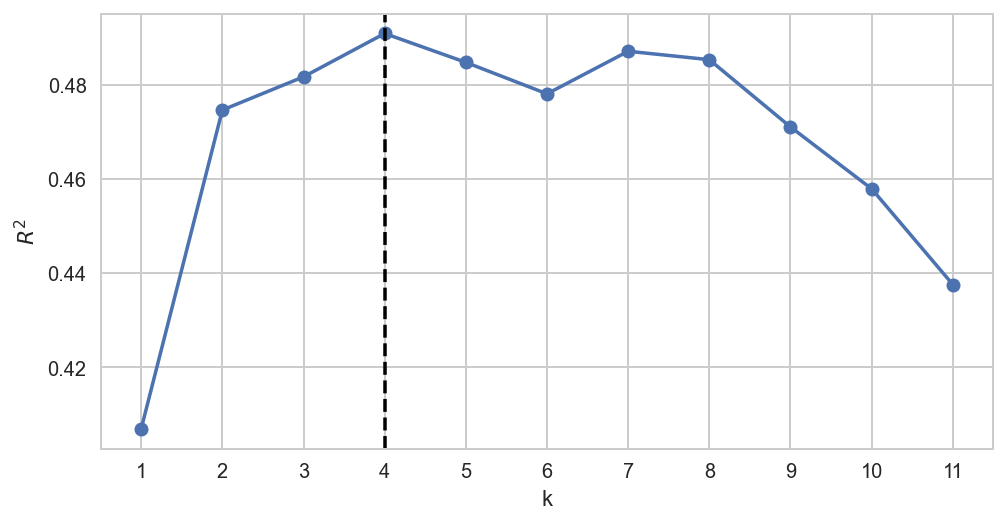

In [49]:
ks = params['n_neighbors']
scores = knn.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(ks, scores, '-o')
ax.axvline(knn.best_params_['n_neighbors'], ls='--', c='k')
# ax.set_xscale('log', base=10)
ax.set_xticks(ks)
ax.set_xlabel('k')
ax.set_ylabel('$R^2$')
plt.show()

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*